# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, Iam investigating a movies dataset collected from The Movie Database (TMDb) that has more than 10k movies with their related data such as their revenue, budget, genres, release date ... etc. 
>
> The goal is to explore this dataset containing 21 columns and pose questions to answer along the way to hopefully by the end we find something interesting !
>
>Interesting questions to answer:
>
>1. What is the highest rating movie?
>2. What is the lowest rating movie?
>3. In which year movies made the highest revenue?
>4. Which movie had the most profit?
>5. Does the runtime affect movie profit?
>6. What is the average rating?
>7. What is the top movie genre?
>8. Does newer movies have more popularity?

>**Note** i am assuming that currency unit is US dollars


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [128]:
# Loading the movie dataset to df_movies
df_movies = pd.read_csv('tmdb-movies.csv')
# Displaying first 10 rows of the dataset
df_movies.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [129]:
# Displaying the last 10 rows of the dataset
df_movies.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [130]:
# Showing info about the whole dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [131]:
# Taking a look at summary statistics
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning (Removing unused columns from the dataset)
> We need to remove unused columns (imdb_id, homepage, tagline, keywords, overview)

In [132]:
# dropping columns
df_movies.drop(['imdb_id','cast', 'homepage', 'tagline','keywords', 'overview','production_companies'], axis=1, inplace=True)

In [133]:
#making sure they dropped
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [134]:
# Adding a new column profit_adj to count profit
df_movies.insert(14,'profit_adj', df_movies['revenue_adj'] - df_movies['budget_adj'])
 
df_movies.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [135]:
# To display how many null values in the dataset
df_movies.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
profit_adj         0
dtype: int64

In [136]:
# Dropping null values
df_movies.dropna(subset = ['director','genres'], how = 'any', inplace=True)
df_movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
profit_adj        0
dtype: int64

In [137]:
# counting zero values in budget column
(df_movies['budget'] == 0).sum()

5636

In [138]:
# counting zero values in revenue column
(df_movies['revenue'] == 0).sum()

5952

In [139]:
# counting zero values in runtime column
(df_movies['runtime'] == 0).sum()

28

> Budget, revenue, and runtime columns are containing zero values, we need to handle this by one of the many missing data handling technqiues. I am taking an approach of filling the zero values of each column with their mean rather than dropping them to avoid bias results. 

In [140]:
# declaring variables to store mean values for each of the three columns.
budget_mean = df_movies['budget'].mean()
revenue_mean = df_movies['revenue'].mean()
runtime_mean = df_movies['runtime'].mean()

In [141]:
# Filling budget, revenue, runtime zero columns with their mean values  
df_movies['budget']  = df_movies['budget'].replace(0, budget_mean)
df_movies['revenue'] = df_movies['revenue'].replace(0, revenue_mean)
df_movies['runtime'] = df_movies['runtime'].replace(0, runtime_mean)

> Now we need to check whether or not we have properly filled zero values.

In [142]:
# counting zero values in budget column
(df_movies['budget'] == 0).sum()

0

In [143]:
                              # This function defined so it can be used in question 7 
    
# defining a function that splits each genre
def splitGenres(column):
    # Seperate each cloumn by "|"
    data = df_movies[column].str.cat(sep = '|')
    # Append data
    data = pd.Series(data.split('|'))
    # Arrange in descending order
    count = data.value_counts(ascending = False)
    
    return count

### Removing duplicated if any

In [144]:
# counting duplicated
df_movies.duplicated().sum()

1

In [145]:
# deleting duplicated
df_movies.drop_duplicates(inplace=True)

In [146]:
# making sure duplicates are deleted
df_movies.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the highest rating movie?)

In [147]:
# Getting the highest rating movie and assigning it to highest_rating
highest_rating = df_movies['vote_average'].idxmax()

# Displaying the movie name
movie_name = df_movies.loc[highest_rating, 'original_title']
print(movie_name)

# Retrieving the whole record
df_movies.loc[[highest_rating]]

The Story of Film: An Odyssey


,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
3894,125336,0.006925,1.471255e+07,4.006196e+07,The Story of Film: An Odyssey,Mark Cousins,900.0,Documentary,9/3/11,14,9.2,2011,0.0,0.0,0.0


### Research Question 2  (What is the lowest rating movie?)

In [148]:
# Getting the lowest rating movie and assigning it to lowest_rating
lowest_rating = df_movies['vote_average'].idxmin()

# Displaying the movie name
movie_name = df_movies.loc[lowest_rating, 'original_title']
print("Movie name: " +movie_name)

# Retrieving the whole record
df_movies.loc[[lowest_rating]]

Movie name: Transmorphers


,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
7772,25055,0.12112,1.471255e+07,4.006196e+07,Transmorphers,Leigh Scott,86.0,Action|Adventure|Science Fiction,6/26/07,10,1.5,2007,0.0,0.0,0.0


### Research Question 3  (In which year movies made the highest revenue?)

Highest revenue year: 2015


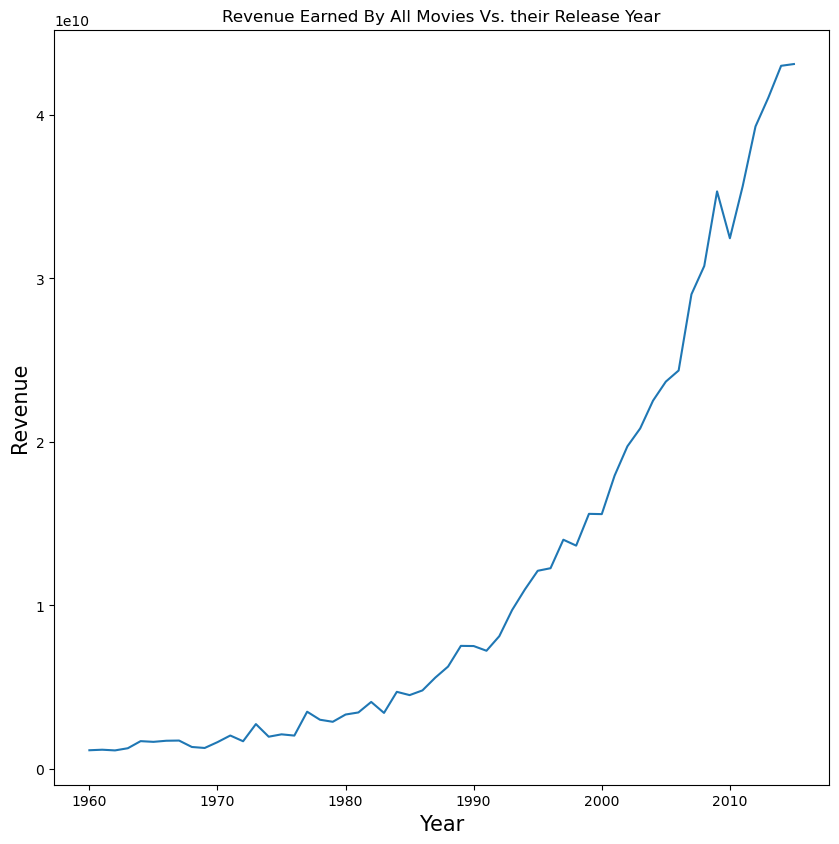

In [159]:
revenue_year = df_movies.groupby('release_year')['revenue'].sum()

# Figure size(width, height)
plt.figure(figsize=(10,10), dpi=100)

# Assigning year to x-axis title
plt.xlabel('Year', fontsize = 15)
# Assiging revenue to y-axis title
plt.ylabel('Revenue', fontsize = 15)
# Title of the line plot
plt.title('Revenue Earned By All Movies Vs. their Release Year')
# Plotting the graph
plt.plot(revenue_year)
# Displaying which year movies made the highest revenue
print("Highest revenue year: "+ str(revenue_year.idxmax()))

### Observations
> As the plot indicates, Movies are generating more revenue by each year.
>
> what is interesting is that there is a noticeable increase of revenue started from (1990 - 2000). By the year 2000 the revenue reached 1 billion which is double the revenue reached in 1990 and stayed growing almost exponentially

### Research Question 4  (Which movie had the most profit?)

In [150]:
# Getting the highest rating movie and assigning it to highest_rating
highest_profit = df_movies['profit_adj'].idxmax()

# Displaying the movie name
movie_name = df_movies.loc[highest_profit, 'original_title']
movie_profit = df_movies.loc[highest_profit, 'profit_adj']
print("Movie name: " +movie_name)
print("profit: "+ str(movie_profit))

# Retrieving the whole record
df_movies.loc[[highest_profit]]

Movie name: Star Wars
profit: 2750136650.919176


,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
1329,11,12.037933,11000000.0,775398007.0,Star Wars,George Lucas,121.0,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09


### Research Question 5  (Does the runtime affect movie profit)

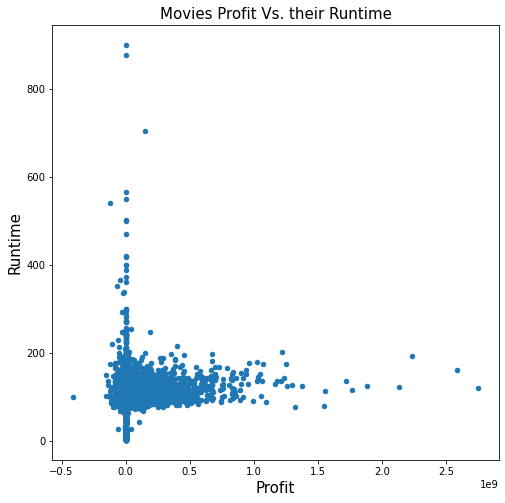

In [151]:
df_movies.plot(x = 'profit_adj', y = 'runtime', kind = 'scatter', figsize=(8,8));
plt.title('Movies Profit Vs. their Runtime', fontsize=15)
plt.xlabel('Profit', fontsize=15)
plt.ylabel('Runtime', fontsize=15);

### Observations
> The scatter plot shows that there is a correlation between runtime and profit.
> 
> Most movies with high profit had a runtime between (100 - 200) minutes

### Research Question 6  (What is the average rating?)

Average Rating: 5.97


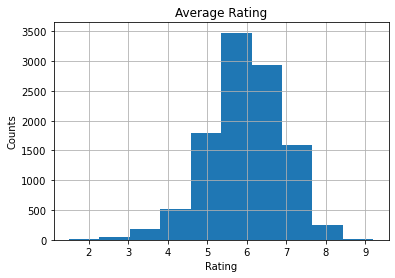

In [152]:
avg_rate = df_movies['vote_average'].mean()
print("Average Rating: %.2f" % (avg_rate))
df_movies['vote_average'].hist();
plt.title('Average Rating');
plt.xlabel('Rating');
plt.ylabel('Counts');

### Research Question 7  (What is the top movie genre?)

TV Movie            162
Western             164
Foreign             185
War                 270
History             332
Music               402
Documentary         509
Animation           692
Mystery             809
Fantasy             912
Family             1223
Science Fiction    1223
Crime              1353
Adventure          1466
Horror             1636
Romance            1708
Action             2378
Thriller           2904
Comedy             3782
Drama              4754
dtype: int64

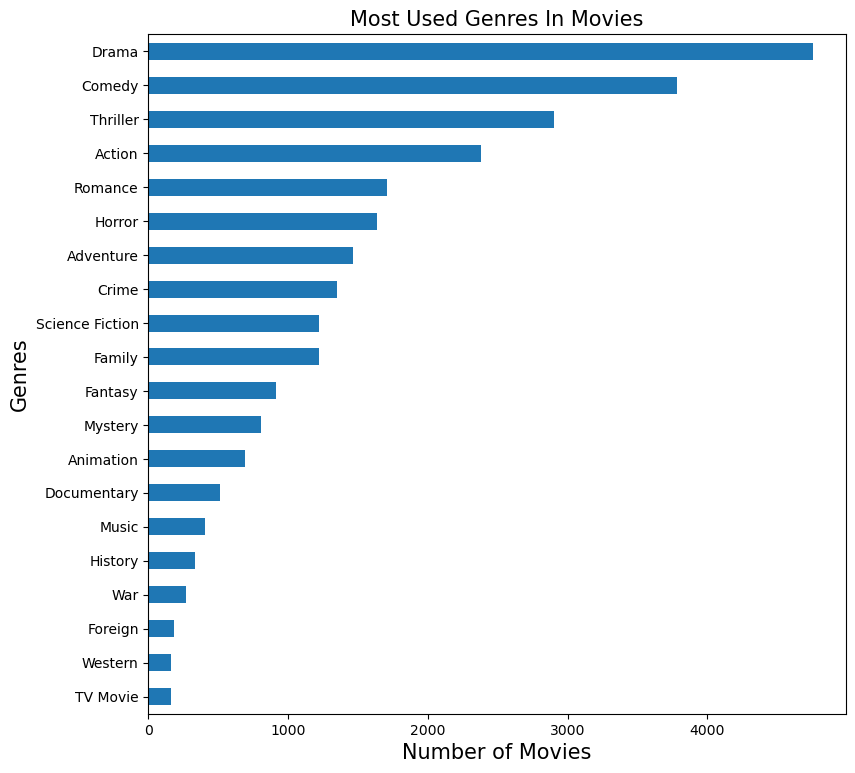

In [153]:
# calling the function that split each genre and store it in all_genres
all_genres = splitGenres('genres')

# plot the graph in descending order
all_genres.sort_values(ascending = True, inplace=True)
# Figure size(width, height)
plt.figure(figsize=(9,9), dpi=100)
# Assigning number of movies to x-axis title
plt.xlabel('Number of Movies',fontsize=15)
# Assigning Genres to x-axis title
plt.ylabel('Genres',fontsize=15)
# Title of the plot
plt.title('Most Used Genres In Movies', fontsize=15)
all_genres.plot.barh();
all_genres

### Observations
>The top genre is Drama with a total of 4760 movie

### Research Question 8  (Does newer movies have more popularity?)

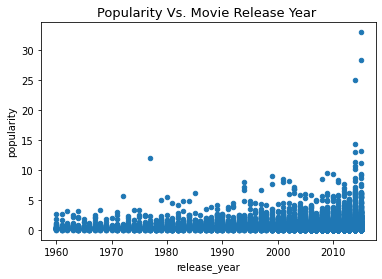

In [20]:
df_movies.plot(x = 'release_year',y='popularity',kind='scatter',fontsize = 10);
plt.title('Popularity Vs. Movie Release Year ', fontsize = 13);

### Observations
> The scatter plot shows that newer movies are more popular than older ones

<a id='conclusions'></a>
## Conclusions

>1- The highest rating movie was "The Story of Film: An Odyssey" released in 2011, even though it was a documentary and this genre is not at the top popular genres.
>
>2- The movie "Transmorphers" released in 2007, classified as "Action|Adventure|Science Fiction" it had the lowest rating.
>
>>  ###### These two observations indicates that if a movie classified as one or more of the top genres it is not necessarily mean that it will have a high rating.
>
>3- The year 2015 was the year which movies had their highest revenue, and what is interesting is that the revenue was increasing in the entire year span and started to grow exponentially since 1990.
>>  ###### one of the reasons that might caused that exponential growth was probably due to the Economic inflation happened between 1983-1990 in the US. [click here to read more](https://scholarship.richmond.edu/cgi/viewcontent.cgi?article=1016&context=economics-faculty-publications)
>
>4- The movie that made the highest profit was "Star wars 1977" with a 2.75 billion dollars.
>
>5- The analysis showed that runtime affects the profit, and most profitable movies had a runtime between (100 - 200) minutes.
>
>6- The voting average of the movies in the dataset is 5.97.
>
>7- The top genre was **Drama** with a **4754** movie, then **comedy** with a **3782** movie.
>
>8- The analysis showed that newer movies are more popular than old movies, the reason might be that newer movies have more budgets that older ones. 
>> ###### Please refer to [this link](https://www.the-numbers.com/movie/budgets/all) for further details. 

<a id='Limitations'></a>
## Limitations
>1-  There are many zeros and null values in the dataset. I chose to leave these values as is instead of filling them with the mean values for columns with numerical data types. This might affect the credibility of the analysis and there might be alternative ways to better process and clean this kind of data.
>
>2- The dataset considered outdated, this project was done in 2021 and the dataset contains data until the year 2015. so, The analysis might not be accurate.
>
>3- The dataset does not indicate the currency, i am not sure if they were all in US dollars but that is what i assumed as i stated at the beginning.